In [23]:
import pandas as pd
import numpy as np
import math
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import norm, skew, probplot
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

In [24]:
df = pd.read_csv('/Users/robertx/Desktop/_/Sophmore-Fall/FA21_Exponent_Project/Data/train.csv')
test = pd.read_csv('/Users/robertx/Desktop/_/Sophmore-Fall/FA21_Exponent_Project/Data/test.csv')
df['LogSalePrice'] = np.log(df['SalePrice'])
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LogSalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,12.247694
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,12.109011
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,12.317167
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,11.849398
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,12.429216


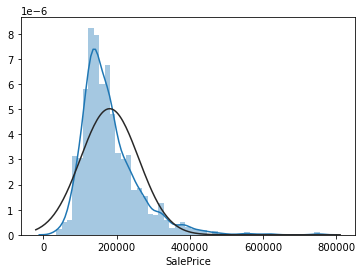

In [25]:
sns.distplot(df.SalePrice,fit=norm)

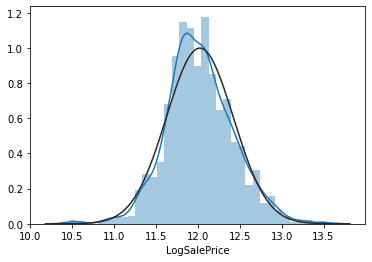

In [100]:
sns.distplot(df.LogSalePrice,fit=norm)

In [136]:
corrmat = df.corr()
corrs = list(corrmat.nlargest(50,'LogSalePrice')['LogSalePrice'].index)[2:]
if 'Neighborhood' not in corrs:
    corrs.append('Neighborhood')
corrs

['OverallQual',
 'GrLivArea',
 'GarageCars',
 'GarageArea',
 'TotalBsmtSF',
 '1stFlrSF',
 'FullBath',
 'YearBuilt',
 'YearRemodAdd',
 'GarageYrBlt',
 'TotRmsAbvGrd',
 'Fireplaces',
 'MasVnrArea',
 'BsmtFinSF1',
 'LotFrontage',
 'WoodDeckSF',
 'OpenPorchSF',
 '2ndFlrSF',
 'HalfBath',
 'LotArea',
 'BsmtFullBath',
 'BsmtUnfSF',
 'BedroomAbvGr',
 'ScreenPorch',
 'PoolArea',
 'MoSold',
 '3SsnPorch',
 'BsmtFinSF2',
 'BsmtHalfBath',
 'Id',
 'MiscVal',
 'OverallCond',
 'YrSold',
 'LowQualFinSF',
 'MSSubClass',
 'KitchenAbvGr',
 'EnclosedPorch',
 'Neighborhood']

In [137]:
x_train, x_test, y_train, y_test = train_test_split(df[corrs], df.LogSalePrice, test_size = 0.4, random_state = 0)
column_trans = make_column_transformer((OneHotEncoder(), ['Neighborhood']), remainder = 'passthrough')
x_train.fillna(0,inplace=True)
y_train.fillna(0,inplace=True)
x_test.fillna(0,inplace=True)

In [138]:
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score
from sklearn.pipeline import make_pipeline
ridgereg = Ridge(alpha=0.45,normalize=True)
regression = make_pipeline(column_trans, ridgereg)
regression.fit(x_train,y_train)
y_pred = regression.predict(x_test)
r2_score(y_test, y_pred)

0.8479983578079485

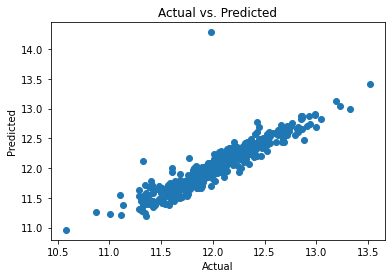

In [139]:
# Plot the results
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')
plt.show()

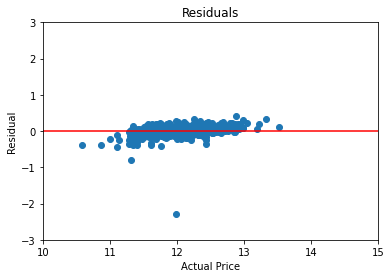

In [148]:
resid = y_test - y_pred
plt.scatter(y_test, resid)
plt.xlabel('Actual Price')
plt.ylabel('Residual')
plt.title('Residuals')
plt.axhline(y=0, color='r', linestyle='-')
plt.xlim([10, 15])
plt.ylim([-3,3])
plt.show()

In [141]:
'''
alphas = list(np.arange(0,1,0.05))
num_vars = list(np.arange(30,70,1))
results = {}
for a in alphas:
    for b in num_vars:
        corrs = list(corrmat.nlargest(b,'LogSalePrice')['LogSalePrice'].index)[2:]
        if 'Neighborhood' not in corrs:
            corrs.append('Neighborhood')
        x_train, x_test, y_train, y_test = train_test_split(df[corrs], df.LogSalePrice, test_size = 0.4, random_state = 0)
        column_trans = make_column_transformer((OneHotEncoder(), ['Neighborhood']), remainder = 'passthrough')
        x_train.fillna(0,inplace=True)
        y_train.fillna(0,inplace=True)
        x_test.fillna(0,inplace=True)
        ridgereg = Ridge(alpha=0.45,normalize=True)
        regression = make_pipeline(column_trans, ridgereg)
        regression.fit(x_train,y_train)
        y_pred = regression.predict(x_test)
        index = str(a)+','+str(b)
        results[index]=r2_score(y_test,y_pred)

max_key = max(results, key=results.get)
print(max_key)
print(results[max_key])
'''

"\nalphas = list(np.arange(0,1,0.05))\nnum_vars = list(np.arange(30,70,1))\nresults = {}\nfor a in alphas:\n    for b in num_vars:\n        corrs = list(corrmat.nlargest(b,'LogSalePrice')['LogSalePrice'].index)[2:]\n        if 'Neighborhood' not in corrs:\n            corrs.append('Neighborhood')\n        x_train, x_test, y_train, y_test = train_test_split(df[corrs], df.LogSalePrice, test_size = 0.4, random_state = 0)\n        column_trans = make_column_transformer((OneHotEncoder(), ['Neighborhood']), remainder = 'passthrough')\n        x_train.fillna(0,inplace=True)\n        y_train.fillna(0,inplace=True)\n        x_test.fillna(0,inplace=True)\n        ridgereg = Ridge(alpha=0.45,normalize=True)\n        regression = make_pipeline(column_trans, ridgereg)\n        regression.fit(x_train,y_train)\n        y_pred = regression.predict(x_test)\n        index = str(a)+','+str(b)\n        results[index]=r2_score(y_test,y_pred)\n\nmax_key = max(results, key=results.get)\nprint(max_key)\nprint

In [142]:
X = test[corrs]
column_trans = make_column_transformer((OneHotEncoder(), ['Neighborhood']), remainder = 'passthrough')
X.fillna(0,inplace=True)
pred = regression.predict(X)


/Users/robertx/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [114]:
submission = pd.DataFrame({'ID': test['Id'],'SalePrice': np.exp(pred)})
submission

,ID,SalePrice
0,1461,124512.439197
1,1462,153682.544766
2,1463,177998.724978
3,1464,195484.113618
4,1465,196592.066990
...,...,...
1454,2915,85719.220897
1455,2916,94130.229284
1456,2917,182719.161484
1457,2918,110834.882891


In [115]:
submission.to_csv('submission1.csv', index=False)